# Transformer Representations

This notebook serves as the primary script to produce Transformer representations (embeddings, transformations, and transformation magnitudes) for the regression analyses in the paper.

It relies on the `narrative-transcript-processing` notebook to produce suitable TR-divided input, and the `transformer_utils` functions to produce different representations.

In [2]:
# Ensure that we re-load changes automagically
%load_ext autoreload
%autoreload 2

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from transformer_utils import TransformerRSM

STIMULUS = "pieman" # 21st_year, pieman, slumlordreach, black

MODEL = 'bert-base-uncased' 
# BERT: bert-base-uncased, bert-large-uncased
# GPT: gpt2, gpt2-xl, gpt-neo-2.7B

foo = TransformerRSM(STIMULUS, model_name=MODEL, verbose=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Looking for TR-aligned tokens in data/stimuli/pieman/tr_tokens.csv
Loaded 277 TRs.


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Produce Layerwise Activations / Z-Reps

In [3]:
ACTIVATIONS = True
Z_REPS = True

foo.process_stimulus_activations(save_activations=ACTIVATIONS, save_z_reps=Z_REPS)

/Users/sumers/opt/anaconda3/envs/bert-brains/lib/python3.9/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_lg' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Processing TR 0.

TR 0: Window Stimulus: I began my illustrious
	 TR stimulus: ['i', 'began', 'my', 'illustrious']
Processing TR 100.

TR 100: Window Stimulus: And they recommend against crossing that line But I had just seen the line crossed between a high powered dean and assault with a pastry and I kind of liked it So the first I did was I gave the figure a name I called him Pie Man capital P capital M And I described him as a cape wearing masked avenger Though in fact he’d been capeless And said that as he fled the scene he clicked his heels in rakish glee
	 TR stimulus: ['heels', 'in', 'ra', '##kis', '##h', 'glee']
Processing TR 200.
Processed 277 TRs for activations.


In [4]:
N_LAYERS = len(foo.stimulus_df["activations"][0])

for layer in range(0, N_LAYERS-1):
    
    if ACTIVATIONS:
        layer_activations = foo.layer_activations_from_tensor(foo.stimulus_df["activations"], layer)
        layer_mean_embeddings = np.array([l.mean(0).numpy() for l in layer_activations])
        np.save("{}_{}_layer_{}_activations.npy".format(STIMULUS, MODEL, layer), layer_mean_embeddings)
        print("Layer {}: saved mean embeddings {}".format(layer, layer_mean_embeddings.shape))
    
    if Z_REPS:
        layer_z_reps = foo.layer_activations_from_tensor(foo.stimulus_df["z_reps"], layer)
        layer_mean_z_reps = np.array([l.mean(0).numpy() for l in layer_z_reps])
        np.save("{}_{}_layer_{}_z_representations.npy".format(STIMULUS, MODEL, layer), layer_mean_z_reps)
        print("Layer {}: saved mean z-reps {}".format(layer, layer_mean_z_reps.shape))

layer_glove = foo.layer_activations_from_tensor(foo.stimulus_df["glove"], 0)
np.save("{}_{}_layer_{}_glove.npy".format(STIMULUS, MODEL, 0), layer_glove)

Layer 0: saved mean embeddings (277, 768)
Layer 0: saved mean z-reps (277, 768)
Layer 1: saved mean embeddings (277, 768)
Layer 1: saved mean z-reps (277, 768)
Layer 2: saved mean embeddings (277, 768)
Layer 2: saved mean z-reps (277, 768)
Layer 3: saved mean embeddings (277, 768)
Layer 3: saved mean z-reps (277, 768)
Layer 4: saved mean embeddings (277, 768)
Layer 4: saved mean z-reps (277, 768)
Layer 5: saved mean embeddings (277, 768)
Layer 5: saved mean z-reps (277, 768)
Layer 6: saved mean embeddings (277, 768)
Layer 6: saved mean z-reps (277, 768)
Layer 7: saved mean embeddings (277, 768)
Layer 7: saved mean z-reps (277, 768)
Layer 8: saved mean embeddings (277, 768)
Layer 8: saved mean z-reps (277, 768)
Layer 9: saved mean embeddings (277, 768)
Layer 9: saved mean z-reps (277, 768)
Layer 10: saved mean embeddings (277, 768)
Layer 10: saved mean z-reps (277, 768)
Layer 11: saved mean embeddings (277, 768)
Layer 11: saved mean z-reps (277, 768)


In [5]:
ALL_LAYER_REPS = "scp {}_{}_layer_*_activations.npy {}_{}_layer_*_z_representations.npy tsumers@apps.pni.princeton.edu:/jukebox/griffiths/bert-brains/code/bert-brains/data/{}/{}/raw_embeddings"

print("SCP all model layers and z-reps to PNI:\n")

print(ALL_LAYER_REPS.format(STIMULUS, MODEL, STIMULUS, MODEL, STIMULUS, MODEL))

SCP all model layers and z-reps to PNI:

scp pieman_bert-base-uncased_layer_*_activations.npy pieman_bert-base-uncased_layer_*_z_representations.npy tsumers@apps.pni.princeton.edu:/jukebox/griffiths/bert-brains/code/bert-brains/data/pieman/bert-base-uncased/raw_embeddings


count    277.000000
mean       3.722022
std        2.375597
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       12.000000
Name: n_transformer_tokens_in_tr, dtype: float64


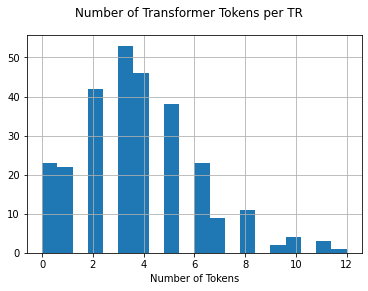

In [6]:
print(foo.stimulus_df.n_transformer_tokens_in_tr.describe())
foo.stimulus_df.n_transformer_tokens_in_tr.hist(bins=20);
plt.suptitle("Number of Transformer Tokens per TR")
plt.xlabel("Number of Tokens");

# Attention Distance

Used for the headwise-distance figure, subplot 5B.

In [7]:
# Median number of tokens per TR is 5; 75th percentile is 7.
# Assuming we're using about 30 seconds of prior context, that's 20 TRs, so we should take 100-140 context tokens.

N_ATTENTION_TOKENS = 128 # 10, 20, 128

In [8]:
foo.verbose = False
foo.process_stimulus_attentions(num_window_tokens=N_ATTENTION_TOKENS)

Processing TR 0
Processing TR 100


Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors


Processing TR 200


In [9]:
print("Successfully produced attention maps for {} of {} TRs.".format( 
    len(foo.stimulus_df[~foo.stimulus_df.attentions.isnull()]), len(foo.stimulus_df)))

Successfully produced attention maps for 249 of 277 TRs.


In [10]:
has_attentions = foo.stimulus_df[foo.stimulus_df.attentions.isnull()]
failed_attentions = foo.stimulus_df[~foo.stimulus_df.attentions.isnull()]

In [14]:
foo.mask_non_tr_attentions(include_forwards=False, include_backwards=True)
foo.compute_attention_head_distances()
    
has_attentions = foo.stimulus_df[foo.stimulus_df.attention_distances.notnull()]["attention_distances"].values

Processing TR 0.
Processing TR 100.
Processing TR 200.


In [15]:
head_distances = np.zeros((12, 12))

for tr in has_attentions:
    for i, layer in enumerate(tr):
        for j, head in enumerate(layer):
            head_distances[i][j] += tr[i][j]

head_distances = head_distances / len(has_attentions)

In [16]:
distance_output = "{}_{}_headwise-distance_T-{}_D-{}.npy".format(STIMULUS, MODEL, N_ATTENTION_TOKENS, attention_direction)
np.save(distance_output, head_distances)

In [17]:
distance_output_raw = "raw_{}_{}_headwise-distance_T-{}_D-{}.npy".format(STIMULUS, MODEL, N_ATTENTION_TOKENS, attention_direction)
np.save(distance_output_raw, has_attentions)

In [18]:
head_distances.shape

(12, 12)

Text(33.0, 0.5, 'Layer')

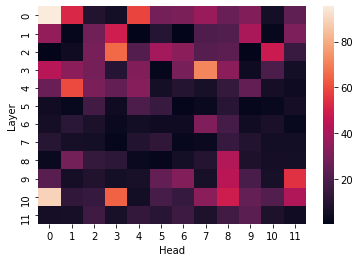

In [19]:
plt.figure()
sns.heatmap(head_distances)
plt.xlabel("Head")
plt.ylabel("Layer")

## Combining distances across stimuli

In [21]:
attention_direction = "bck"
stimuli = ["slumlordreach", "black"]

distance_files_raw = "raw_{}_{}_headwise-distance_T-{}_D-{}.npy"

distance_inputs = [distance_files_raw.format(s, MODEL, N_ATTENTION_TOKENS, attention_direction) for s in stimuli]
distance_npy = [np.load(f, allow_pickle=True) for f in distance_inputs]
concated_distances = np.concatenate(distance_npy)

combined_head_distances = np.zeros((12, 12))

for tr in concated_distances:
    for i, layer in enumerate(tr):
        for j, head in enumerate(layer):
            combined_head_distances[i][j] += tr[i][j]

combined_head_distances = combined_head_distances / len(concated_distances)

out_file = "combined_black_slumlord_bert-base-uncased_headwise-distance_T-128_D-{}.npy".format(attention_direction)
np.save(out_file, combined_head_distances)

Text(33.0, 0.5, 'Layer')

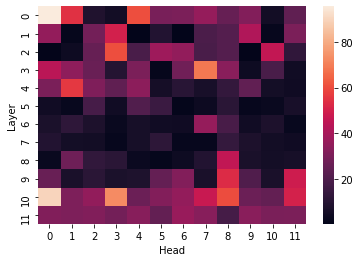

In [22]:
plt.figure()
sns.heatmap(combined_head_distances)
plt.xlabel("Head")
plt.ylabel("Layer")

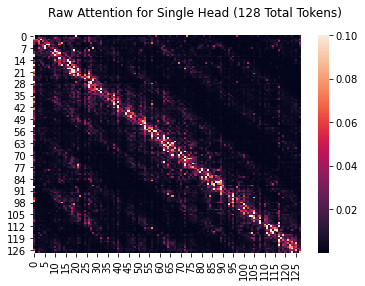

In [24]:
sns.heatmap(foo.stimulus_df.attentions.iloc[50][0][11], vmax=.1)
plt.suptitle("Raw Attention for Single Head ({} Total Tokens)".format(N_ATTENTION_TOKENS));

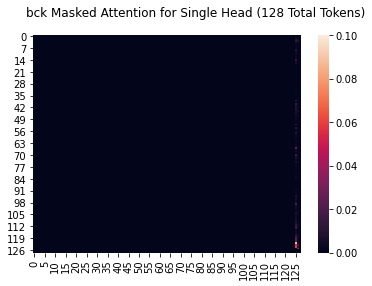

In [25]:
sns.heatmap(foo.stimulus_df.masked_attentions.iloc[50][0][11], vmax=.1)
plt.suptitle("{} Masked Attention for Single Head ({} Total Tokens)".format(attention_direction, N_ATTENTION_TOKENS));